In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
train = pd.read_csv("./biketrain.csv", parse_dates=['datetime'])
test = pd.read_csv("./biketest.csv", parse_dates=['datetime'])
sub = pd.read_csv("./bikesampleSubmission.csv")

train.shape, test.shape, sub.shape

((10886, 12), (6493, 9), (6493, 2))

(array([4284., 2337., 1686., 1067.,  633.,  426.,  233.,  116.,   85.,
          19.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <BarContainer object of 10 artists>)

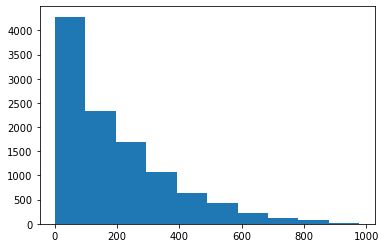

In [52]:
plt.hist(train['count'])

In [53]:
# 정규분포 형태가 아님

In [54]:
import seaborn as sns

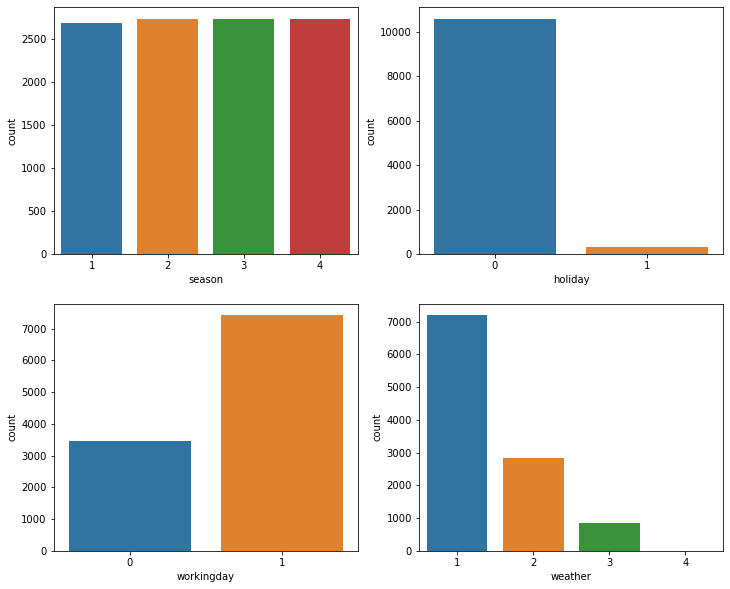

In [55]:
col_names = [ 'season', 'holiday', 'workingday', 'weather'  ]
i = 0
plt.figure(figsize=(12,10))   # 전체 그래프의 크기 지정 

for name in col_names:        # 컬럼명을 전달 리스트 수 만큼 반복 -> 4회 
    i = i + 1                 # 숫자를 1씩 증가.
    plt.subplot(2,2,i)        # 2행 2열에 i번째 그래프 선택
    sns.countplot(x=name, data=train)  # i번째 그래프에 sns.countplot를 그리겠다.

In [56]:
### temp, atemp, humidity, windspeed

num_names = ['temp', 'atemp', 'humidity', 'windspeed']
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

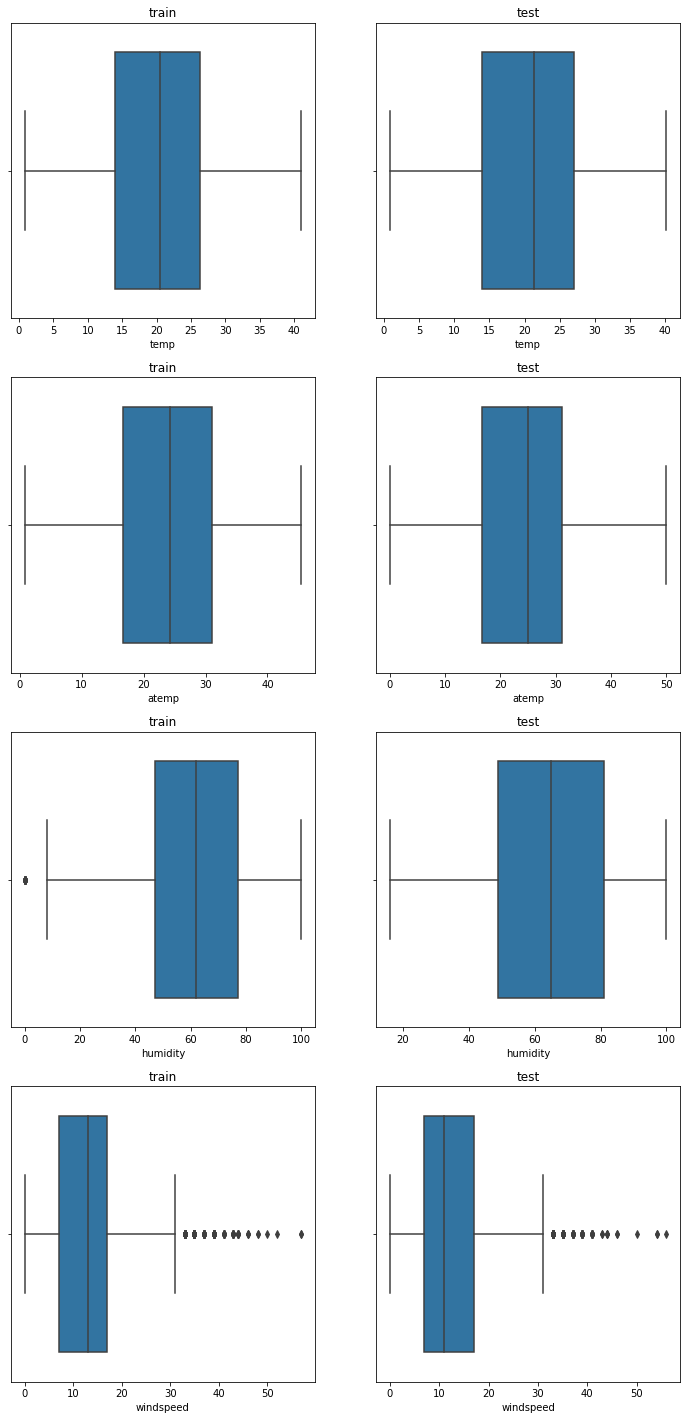

In [57]:
i = 0
plt.figure(figsize=(12,25))   # 전체 그래프의 크기 지정 (가로, 세로)

for name in num_names:        # 컬럼명을 전달 리스트 수 만큼 반복 -> 4회
    i = i + 1                 # 숫자를 1씩 증가.
    plt.subplot(4,2,i*2-1)        # 2행 2열에 i번째 그래프 선택
    sns.boxplot(x=name, data=train)  # i번째 그래프에 sns.countplot를 그리겠다.
    plt.title("train")
    plt.subplot(4,2,i*2)        # 2행 2열에 i번째 그래프 선택
    sns.boxplot(x=name, data=test)  # i번째 그래프에 sns.countplot를 그리겠다.
    plt.title("test")
plt.show() 

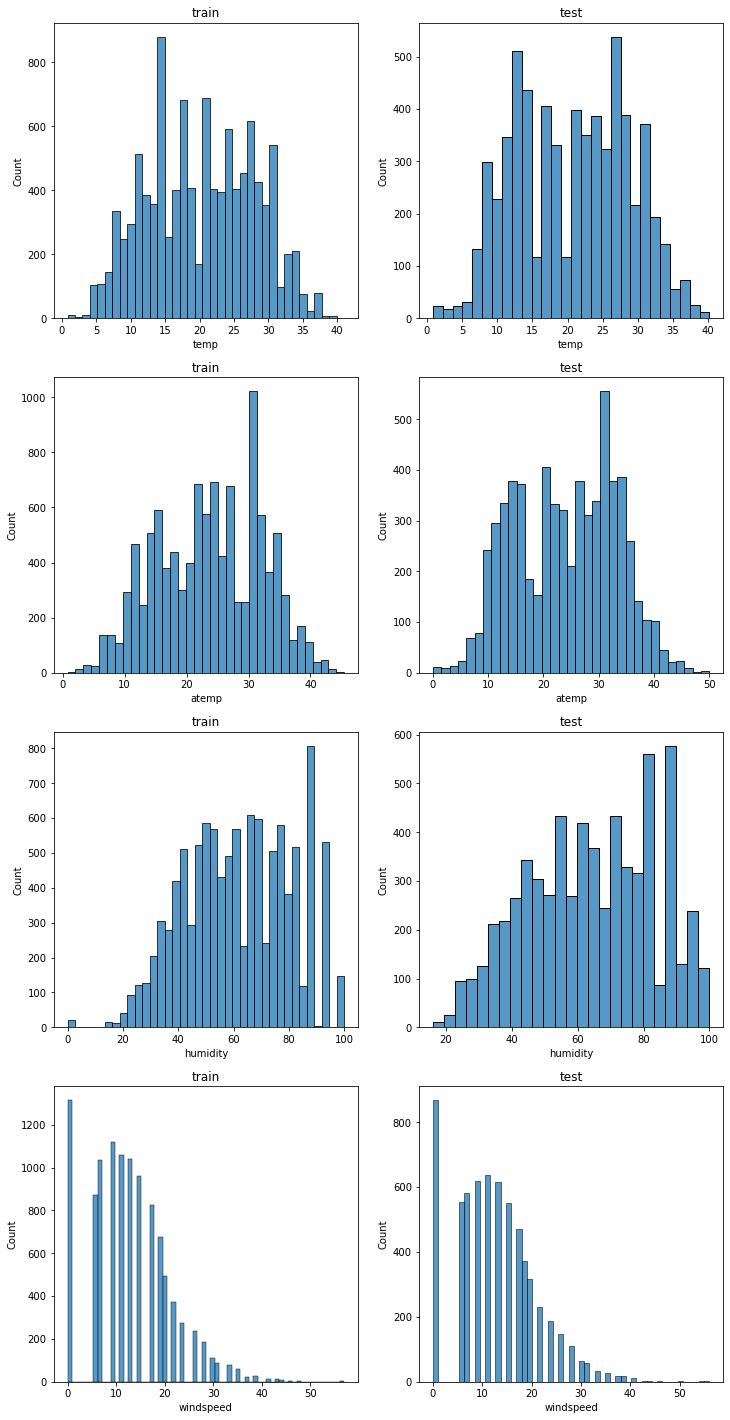

In [58]:
i = 0
plt.figure(figsize=(12,25))   # 전체 그래프의 크기 지정 (가로, 세로)

for name in num_names:        # 컬럼명을 전달 리스트 수 만큼 반복 -> 4회
    i = i + 1                 # 숫자를 1씩 증가.
    plt.subplot(4,2,i*2-1)        # 2행 2열에 i번째 그래프 선택
    sns.histplot(x=name, data=train)  # i번째 그래프에 sns.countplot를 그리겠다.
    plt.title("train")
    
    plt.subplot(4,2,i*2)        # 2행 2열에 i번째 그래프 선택
    sns.histplot(x=name, data=test)  # i번째 그래프에 sns.countplot를 그리겠다.
    plt.title("test")
plt.show() 

In [59]:
new_tr = train.copy()
new_test = test.copy()

In [60]:
new_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [61]:
new_tr.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [62]:
new_tr['year'] = new_tr['datetime'].dt.year
new_tr['month'] = new_tr['datetime'].dt.month
new_tr['day'] = new_tr['datetime'].dt.day
new_tr['hour'] = new_tr['datetime'].dt.hour
new_tr['minute'] = new_tr['datetime'].dt.minute
new_tr['second'] = new_tr['datetime'].dt.second

In [63]:
new_tr.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [65]:
new_test['year'] = new_test['datetime'].dt.year
new_test['month'] = new_test['datetime'].dt.month
new_test['day'] = new_test['datetime'].dt.day
new_test['hour'] = new_test['datetime'].dt.hour
new_test['minute'] = new_test['datetime'].dt.minute
new_test['second'] = new_test['datetime'].dt.second

new_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0


In [66]:
new_tr.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.004797,0.971524,0.001729,-0.006546,NaN,NaN
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.015877,-0.000354,NaN,NaN
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,0.009829,0.002780,NaN,NaN
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.007890,-0.022740,NaN,NaN
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.015551,0.145430,NaN,NaN
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.011866,0.140343,NaN,NaN
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.011335,-0.278011,NaN,NaN
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,0.036157,0.146631,NaN,NaN
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.014109,0.302045,NaN,NaN
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,0.019111,0.380540,NaN,NaN


<AxesSubplot:>

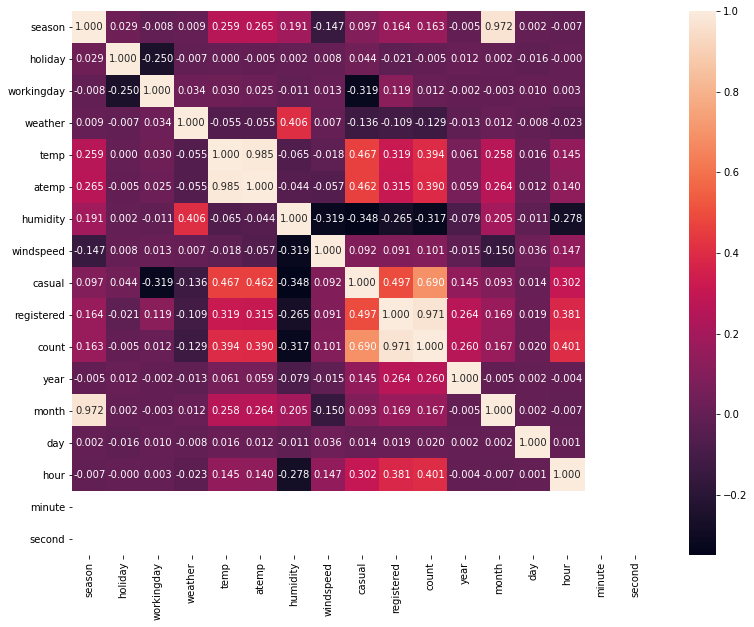

In [69]:
plt.figure(figsize=(13,10))
val = new_tr.corr()
sns.heatmap(val, annot=True, fmt='.3f')

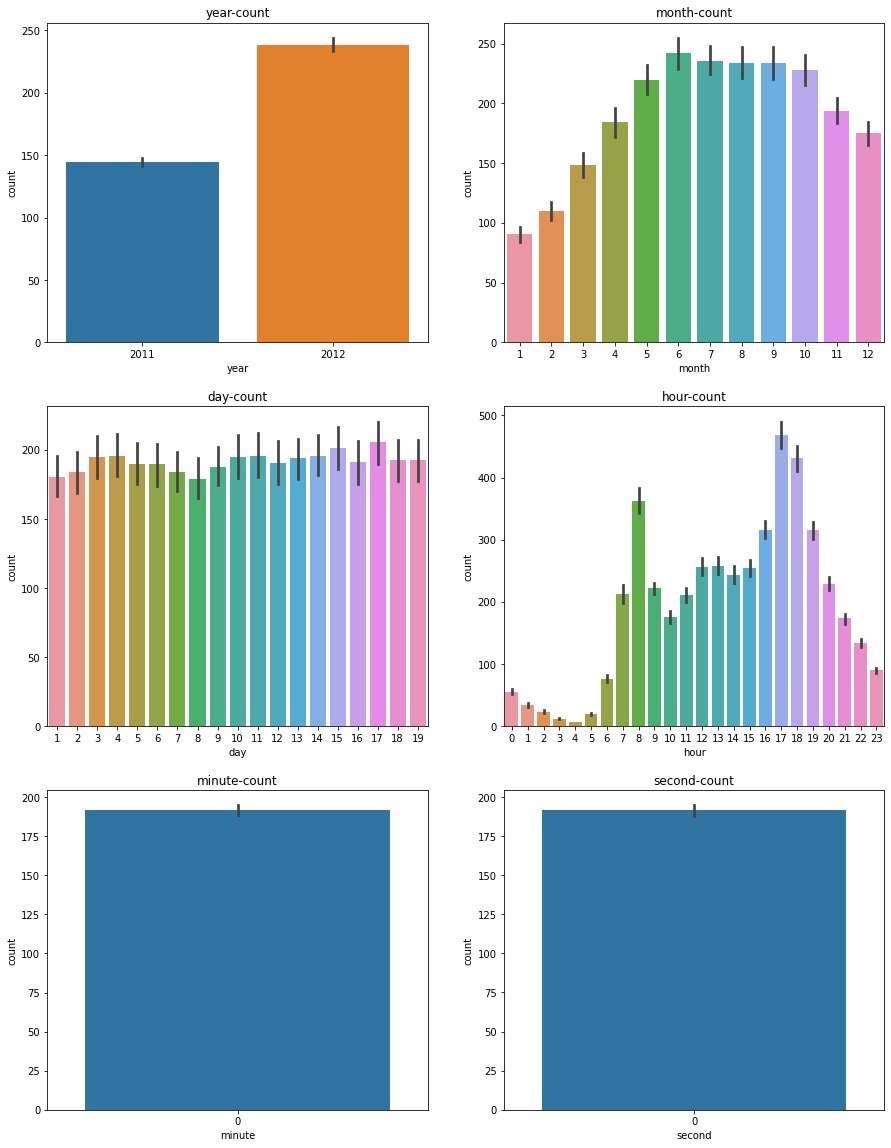

In [73]:
datetime_names = ['year', 'month', 'day', 'hour', 'minute', 'second']

plt.figure(figsize=(15,20))
for idx, name in enumerate(datetime_names):
    plt.subplot(3,2,idx+1)
    sns.barplot(x=name, y='count', data=new_tr)
    plt.title(name + "-count")
    
plt.show()

* 2011, 2012년도, 매년 증가하고 있다
* 여름철에 더 많은 사람들이 이용한다
* 1~19일까지 데이터
* 새벽시간대 수요가 거의 없다
* 출퇴근시간대 수요가 많다
* 분과 초는 데이터의 구분이 없다 (minute, second x)

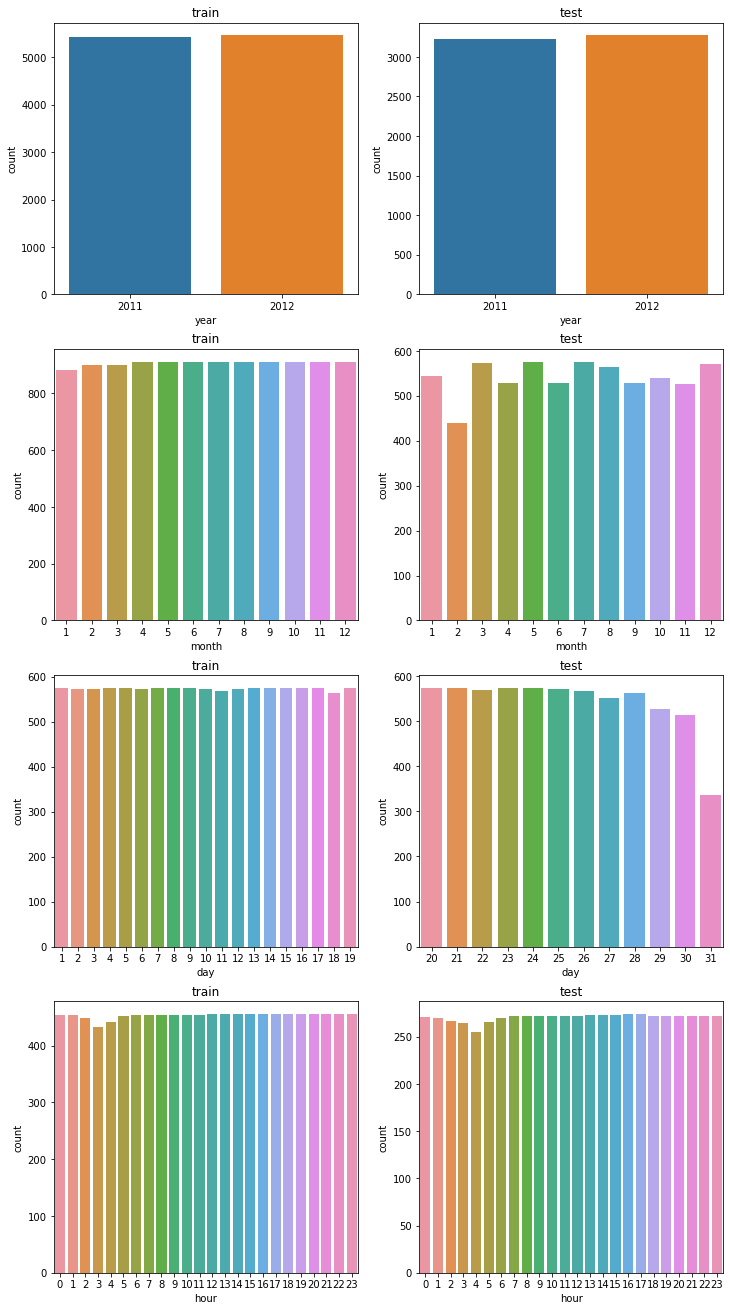

In [74]:
col_names = ['year','month','day','hour']

i = 0
plt.figure(figsize=(12,35))  ##전체 그래프 크기 지정

for name in col_names: ## 컬럼명으로 반복
  i = i+1
  plt.subplot(6,2,i)  ##2행2열, i = 1,2,3,4 (왼쪽 상단부터 시계방향으로 순번 지정)
  sns.countplot(x=name, data = new_tr)
  plt.title('train')
  
  i = i+1
  plt.subplot(6,2,i)  ##2행2열, i = 1,2,3,4 (왼쪽 상단부터 시계방향으로 순번 지정)
  sns.countplot(x=name, data = new_test)
  plt.title('test')
  
plt.show()

* 2, 4, 6월의 데이터가 약간 적다
* 매월 31일의 데이터가 적다

In [75]:
new_tr['dayofweek'] = new_tr['datetime'].dt.dayofweek
new_test['dayofweek'] = new_test['datetime'].dt.dayofweek

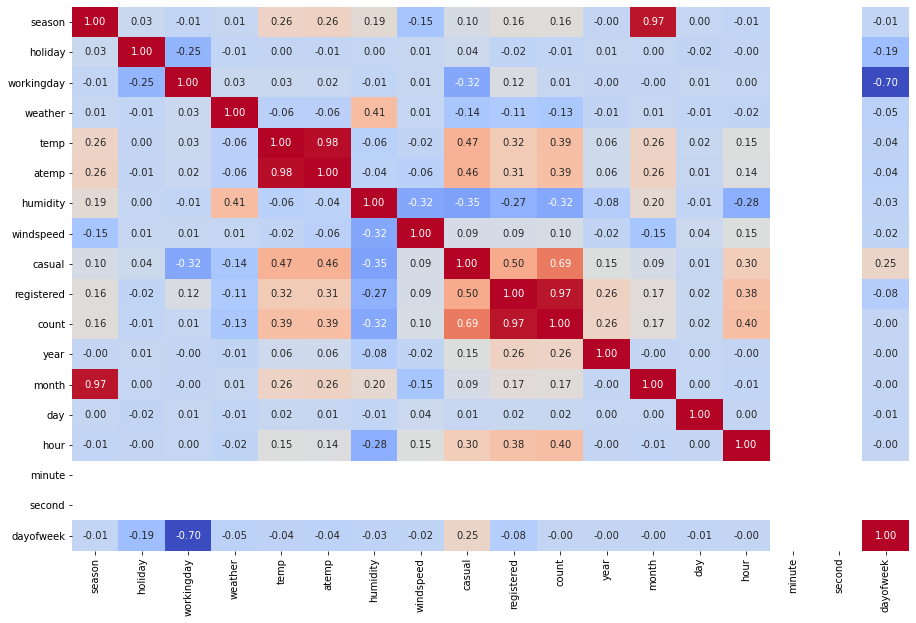

In [76]:
plt.figure(figsize=(15,10))
g = sns.heatmap(new_tr.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=False)

In [77]:
feature_names = [ 'season', 'holiday', 'workingday', 'weather', 
                  'temp', 'atemp', 'humidity', 'windspeed', 
                  "year", "hour", "dayofweek"]  # 공통 변수

X_tr_all = new_tr[feature_names]  # 학습용 데이터 변수 선택
X_test_all = new_test[feature_names]    # 테스트 데이터의 변수 선택 
print(X_tr_all.head())

   season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   year  hour  dayofweek  
0  2011     0          5  
1  2011     1          5  
2  2011     2          5  
3  2011     3          5  
4  2011     4          5  


In [78]:
label_name = 'count'                 # 렌탈 대수 (종속변수)
y_tr_all = new_tr[label_name]        # 렌탈 대수 변수 값 선택

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_tr_all, 
                                                    y_tr_all,
                                                    test_size=0.3,
                                                    random_state=77)

In [81]:
from sklearn.linear_model import LinearRegression   

model = LinearRegression()  # 모델 객체 생성.
model.fit(X_train, y_train)   

# 정확도 확인
print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

학습용 세트 정확도: 0.391
테스트 세트 정확도: 0.377


In [82]:
from sklearn.tree import DecisionTreeRegressor   

model = DecisionTreeRegressor()  # 모델 객체 생성.
model.fit(X_train, y_train)   

# 정확도 확인
print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

학습용 세트 정확도: 1.000
테스트 세트 정확도: 0.897


In [83]:
from sklearn.ensemble import RandomForestRegressor   # 앙상블(의사결정트리 확장판)

seed = 37
model = RandomForestRegressor(n_jobs=-1, random_state=seed)  # 모델 객체 생성.
model.fit(X_train, y_train)           # 모델 학습(공부가 되었다.)  

# 정확도 확인
print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

학습용 세트 정확도: 0.992
테스트 세트 정확도: 0.946


In [84]:
from sklearn.ensemble import GradientBoostingRegressor

seed = 37
model = GradientBoostingRegressor(random_state=seed)  # 모델 객체 생성.
model.fit(X_train, y_train)           # 모델 학습(공부가 되었다.)  

# 정확도 확인
print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

학습용 세트 정확도: 0.860
테스트 세트 정확도: 0.849


### 최종 모델
* 특징 추출
* 특징 선택
* 여러 모델을 비교
* 최적의 모델을 선택 = RandomForestRegressor

In [85]:
from sklearn.ensemble import RandomForestRegressor

seed = 37
model = RandomForestRegressor(n_jobs=-1, random_state=seed)
model.fit(X_train, y_train)
pred = model.predict(X_test_all)
pred[0:10]

array([ 11.75,   4.2 ,   4.78,   3.48,   2.77,   5.65,  37.05, 105.39,
       231.4 , 127.19])

In [86]:
sub['count'] = pred
sub.loc[sub['count']<0, 'count']=0
sub.to_csv('third_sub.csv', index = False)

In [87]:
model.feature_importances_

array([0.03628539, 0.00232723, 0.03567138, 0.01622299, 0.08177621,
       0.03988315, 0.0316861 , 0.01059026, 0.08779102, 0.60955708,
       0.04820919])

In [88]:
X_train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'hour', 'dayofweek'],
      dtype='object')

# 정규화

In [92]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

In [94]:
scaler = MinMaxScaler().fit(X_tr_all)

nor_X_tr_all = scaler.transform(X_tr_all)
ex_X_tr = PolynomialFeatures(degree=2, 
                             include_bias=False).fit_transform(nor_X_tr_all)

y_tr_all = new_tr['count']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(ex_X_tr,
                                                   y_tr_all, 
                                                   test_size=0.2,
                                                   random_state=42)

In [98]:
from sklearn.ensemble import RandomForestRegressor   # 앙상블(의사결정트리 확장판)

seed = 37
model = RandomForestRegressor(n_jobs=-1, random_state=seed)  # 모델 객체 생성.
model.fit(X_train, y_train)           # 모델 학습(공부가 되었다.)  

# 정확도 확인
print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

학습용 세트 정확도: 0.992
테스트 세트 정확도: 0.950


In [99]:
nor_X_test_all = scaler.transform(X_test_all)
ex_X_test = PolynomialFeatures(degree=2, 
                              include_bias=False).fit_transform(nor_X_test_all)

In [100]:
ex_X_test.shape

(6493, 77)

In [101]:
pred = model.predict(ex_X_test)
sub['count'] = pred
sub.loc[sub['count']<0, 'count'] = 0
sub.to_csv('four_sub.csv', index=False)